In [1]:
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):
    return 3*x**2-4*x


In [6]:
def numerical_lim(f, x, h):
    return ((f(x + h))-f(x))/h


h = 0.1
for i in range(5):
    print(f'h={h:.5f},numerical limit={numerical_lim(f,1,h):.5f}')
    h *= 0.1


h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


In [7]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

In [8]:
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize']=figsize

In [12]:
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


In [13]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

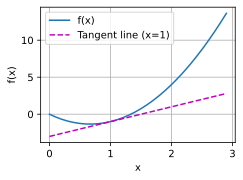

In [14]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [17]:
def y(x):
    return (x**3-1/x)

In [21]:
x=np.arange(0,3,0.1)
plot(x,[y(x),4*x-4],'x','f(x)',legend=['f(x)','Tangent line(x=1)'])

SyntaxError: invalid character in identifier (<ipython-input-21-7a3eba4f4b37>, line 1)

In [22]:
import torch
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [23]:
x.requires_grad_(True)
x.grad

In [24]:
y=2*torch.dot(x,x)

In [25]:
y

tensor(28., grad_fn=<MulBackward0>)

In [26]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l


In [5]:
fair_probs=torch.ones([6])/6
print(fair_probs)
multinomial.Multinomial(1,fair_probs).sample()#传入大小，概率和使用抽样抽样

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([0., 0., 0., 1., 0., 0.])

In [33]:
n=1000000
counts=multinomial.Multinomial(n,probs=fair_probs).sample() #投10次，每次都是按照fair_probs 的权重，累加到结果
counts/n


tensor([0.1668, 0.1670, 0.1666, 0.1669, 0.1661, 0.1667])

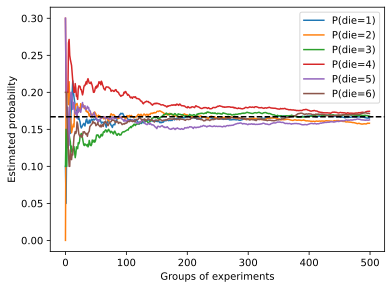

In [35]:
counts=multinomial.Multinomial(10,fair_probs).sample((500,)) #让我们进行500组实验，每组抽取10个样本。
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdim=True)
d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),
                 label=("P(die="+str(i+1)+")"))
d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [36]:
help(torch.arange)

Help on built-in function arange:

arange(...)
    arange(start=0, end, step=1, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a 1-D tensor of size :math:`\left\lceil \frac{\text{end} - \text{start}}{\text{step}} \right\rceil`
    with values from the interval ``[start, end)`` taken with common difference
    :attr:`step` beginning from `start`.
    
    Note that non-integer :attr:`step` is subject to floating point rounding errors when
    comparing against :attr:`end`; to avoid inconsistency, we advise adding a small epsilon to :attr:`end`
    in such cases.
    
    .. math::
        \text{out}_{{i+1}} = \text{out}_{i} + \text{step}
    
    Args:
        start (Number): the starting value for the set of points. Default: ``0``.
        end (Number): the ending value for the set of points
        step (Number): the gap between each pair of adjacent points. Default: ``1``.
    
    Keyword args:
        out (Tensor, optiona